In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [84]:
path = '/content/Все калибровки.xlsx'
data = pd.read_excel(path)

In [85]:
data.head()

,Растворитель,"Разведение, раз",Fsol15_1,Fsol15_2,Fsol15_3,Trug_1,Trug_2,Trug_3,Fox17_1,Fsol14_1,Fox18_1,Sph10_1,Sph13_1,Rery11_1,Ylip_1
0,Вода,1,19.3,21.9,NaN,18.0,17.2,NaN,19.9,22.1,18.3,12.8,16.2,25.5,24.6
1,Вода,10,22.8,24.2,NaN,22.6,21.7,NaN,21.3,27.1,22.8,18.6,21.3,31.3,29.3
2,Вода,50,29.0,29.0,NaN,27.8,27.8,NaN,27.4,32.6,30.1,25.9,30.0,40.2,32.8
3,Вода,100,30.5,32.1,NaN,31.4,30.2,NaN,29.3,35.3,30.6,29.2,31.1,39.9,34.2
4,Вода,500,33.1,32.9,NaN,32.3,32.4,NaN,30.2,37.2,32.4,30.2,33.0,NaN,34.4


In [86]:
# changing russian names of the columns

data.rename(columns={'Растворитель': 'Diluent', 
                     'Разведение, раз': 'Dilution'}, 
            inplace=True)


In [87]:
data.Diluent.unique()

array(['Вода', 'ФРЕО', 'ЧВК-85', 'Модус', 'ЧВК-205'], dtype=object)

In [88]:
# changing categorical names

data.Diluent = data.Diluent.astype("category")
data.Diluent = data.Diluent.cat.rename_categories({'Вода': 'Water', 
                                                   'ФРЕО': 'FREO', 
                                                   'ЧВК-85': 'CHVK-85', 
                                                   'Модус': 'Modus', 
                                                   'ЧВК-205': 'CHVK-205'})

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Diluent   30 non-null     category
 1   Dilution  30 non-null     int64   
 2   Fsol15_1  30 non-null     float64 
 3   Fsol15_2  30 non-null     float64 
 4   Fsol15_3  23 non-null     float64 
 5   Trug_1    29 non-null     float64 
 6   Trug_2    29 non-null     float64 
 7   Trug_3    24 non-null     float64 
 8   Fox17_1   30 non-null     float64 
 9   Fsol14_1  29 non-null     float64 
 10  Fox18_1   6 non-null      float64 
 11  Sph10_1   6 non-null      float64 
 12  Sph13_1   6 non-null      float64 
 13  Rery11_1  4 non-null      float64 
 14  Ylip_1    6 non-null      float64 
dtypes: category(1), float64(13), int64(1)
memory usage: 3.6 KB


In [90]:
# na presence

data.isna().sum()

Diluent      0
Dilution     0
Fsol15_1     0
Fsol15_2     0
Fsol15_3     7
Trug_1       1
Trug_2       1
Trug_3       6
Fox17_1      0
Fsol14_1     1
Fox18_1     24
Sph10_1     24
Sph13_1     24
Rery11_1    26
Ylip_1      24
dtype: int64

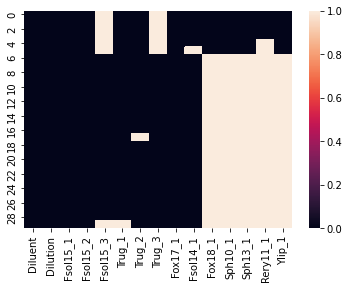

In [91]:
sns.heatmap(data.isnull())

In [92]:
# calculate mean for Fsol15 and Trug

data['Fsol15_mean'] = data[['Fsol15_1', 
                            'Fsol15_2', 
                            'Fsol15_3']].apply(np.mean, axis=1).round(2)
data['Trug_mean'] = data[['Trug_1', 
                          'Trug_2', 
                          'Trug_3']].apply(np.mean, axis=1).round(2)


In [93]:
# keep only one calibration per organism

data_one = data.drop(data.columns[2:8], axis=1)
data_one.head()

,Diluent,Dilution,Fox17_1,Fsol14_1,Fox18_1,Sph10_1,Sph13_1,Rery11_1,Ylip_1,Fsol15_mean,Trug_mean
0,Water,1,19.9,22.1,18.3,12.8,16.2,25.5,24.6,20.6,17.60
1,Water,10,21.3,27.1,22.8,18.6,21.3,31.3,29.3,23.5,22.15
2,Water,50,27.4,32.6,30.1,25.9,30.0,40.2,32.8,29.0,27.80
3,Water,100,29.3,35.3,30.6,29.2,31.1,39.9,34.2,31.3,30.80
4,Water,500,30.2,37.2,32.4,30.2,33.0,NaN,34.4,33.0,32.35


In [94]:
# calculate the mean of all organisms for each dilution

data_one['Mean_Ct'] = data_one.iloc[:, 2:].apply(np.mean, axis=1).round(2)

In [95]:
# show diluent with the max mean Ct for each dilution

dilut_list = [data_one[data_one['Dilution'] == i] 
              for i in data_one.Dilution.unique()]

for i in dilut_list:
    print(i[i['Mean_Ct'] == i['Mean_Ct'].max()][['Dilution', 
                                                 'Diluent', 
                                                 'Mean_Ct']].values)



[[1 'CHVK-205' 23.36]]
[[10 'CHVK-205' 28.0]]
[[50 'CHVK-205' 32.72]]
[[100 'CHVK-205' 34.32]]
[[500 'CHVK-205' 35.14]]
[[1000 'CHVK-205' 37.75]]


In [ ]:
# calibration curves

organisms = [i for i in data_one.iloc[:, 2:11].columns]
diluents = [i for i in data_one.Diluent.unique()]
for org in organisms:
    plt.figure(figsize=(15, 10))
    plt.grid()
    plt.xlabel(xlabel='LOG C', fontsize=14)
    plt.ylabel(ylabel='Cycle', fontsize=14)
    for dil in diluents:
        plot_data = pd.DataFrame({'y': data_one[data_one.Diluent == dil][org],
                                      'x': [2, 1, 0.30103, 0, -0.69897, -1]})
        plot_data = plot_data.dropna()
        if not plot_data.empty:            
            X = plot_data.iloc[:, 1]
            Y = plot_data.iloc[:, 0]
            X = sm.add_constant(X)
            model = sm.OLS(Y, X).fit()
            predictions = model.predict(X)
            plot_data['y_pred'] = predictions
            plt.scatter('x', 'y', data=plot_data, label=f'{org}_{dil}_y')
            plt.plot('x', 'y_pred', data=plot_data, label=f'{org}_{dil}_y_pred')
            plt.legend(loc='upper right', fontsize=12)
              
    plt.show()
    plt.savefig(f'{org}_calibration')    
    plt.close()

